In [1]:
# Install any additional libraries (optional)
!pip install seaborn scikit-learn xgboost --quiet

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier


In [4]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Load the data
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
df.head()


Saving liver_cirrhosis.csv to liver_cirrhosis (2).csv


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns (corrected 'Hepatome' to 'Hepatomegaly')
label_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing data (you can use dropna or fillna)
df = df.dropna()  # or df.fillna(df.mean(numeric_only=True), inplace=True)


Missing values:
 N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [7]:
# Define features and target
X = df.drop(columns=['Stage'])
y = df['Stage']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Shift target labels
df['Stage'] = df['Stage'] - 1

# Split features and target
X = df.drop(columns='Stage')
y = df['Stage']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1657
           1       0.94      0.97      0.95      1697
           2       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

Confusion Matrix:
 [[1572   63   22]
 [  35 1638   24]
 [  17   35 1594]]


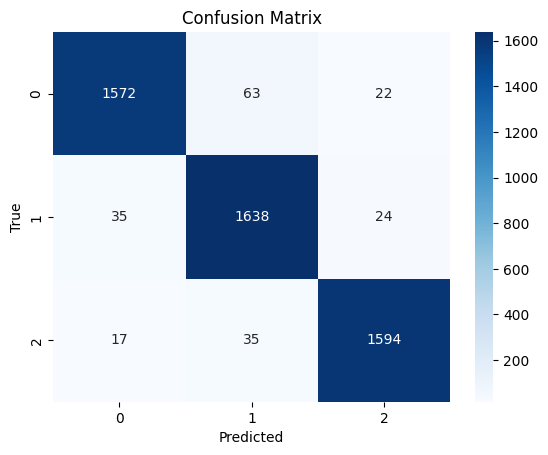

In [11]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import joblib

# Save the trained model
joblib.dump(model, 'liver_stage_xgb_model.pkl')

# To load later:
# model = joblib.load('liver_stage_xgb_model.pkl')


['liver_stage_xgb_model.pkl']

In [15]:
import numpy as np

# Example input function
def get_user_input():
    print("Please enter your medical details below.")

    # Categorical (encoded the same way as training)
    status = input("Status (C=0, CL=1, D=2): ")
    drug = input("Drug (Placebo=1, D-penicillamine=0): ")
    sex = input("Sex (F=0, M=1): ")
    ascites = input("Ascites (N=0, Y=1): ")
    hepatomegaly = input("Hepatomegaly (N=0, Y=1): ")
    spiders = input("Spiders (N=0, Y=1): ")
    edema = input("Edema (N=0, S=1, Y=2): ")

    # Numeric inputs
    age = float(input("Age in days: "))
    bilirubin = float(input("Bilirubin (mg/dl): "))
    cholesterol = float(input("Cholesterol (mg/dl): "))
    albumin = float(input("Albumin (g/dl): "))
    copper = float(input("Copper (ug/day): "))
    alk_phos = float(input("Alk_Phos (U/L): "))
    sgot = float(input("SGOT (U/ml): "))
    triglycerides = float(input("Triglycerides (mg/dl): "))
    platelets = float(input("Platelets (per 1000 ml): "))
    prothrombin = float(input("Prothrombin time (s): "))
    n_days = int(input("Number of days from registration (N_Days): "))

    # Construct input array
    user_data = np.array([[
        n_days, int(status), int(drug), age, int(sex), int(ascites),
        int(hepatomegaly), int(spiders), int(edema), bilirubin,
        cholesterol, albumin, copper, alk_phos, sgot, triglycerides,
        platelets, prothrombin
    ]])

    return user_data

# Get input
user_input = get_user_input()

# Predict
predicted_stage = model.predict(user_input)[0]

# Add 1 back to prediction for original stage range
print(f"\n🔍 Predicted Liver Cirrhosis Stage: {predicted_stage + 1}")


Please enter your medical details below.
Status (C=0, CL=1, D=2): 1
Drug (Placebo=1, D-penicillamine=0): 1
Sex (F=0, M=1): 1
Ascites (N=0, Y=1): 1
Hepatomegaly (N=0, Y=1): 1
Spiders (N=0, Y=1): 1
Edema (N=0, S=1, Y=2): 2
Age in days: 25674
Bilirubin (mg/dl): 87
Cholesterol (mg/dl): 87
Albumin (g/dl): 87
Copper (ug/day): 87
Alk_Phos (U/L): 98
SGOT (U/ml): 67
Triglycerides (mg/dl): 56
Platelets (per 1000 ml): 500
Prothrombin time (s): 34
Number of days from registration (N_Days): 1

🔍 Predicted Liver Cirrhosis Stage: 1
